In [1]:
import matplotlib.pyplot as plt
from tree_learn.util import (plot_instance_evaluation_segments, load_results, get_qualitative_assessment, 
                             get_semantic_assessment, get_instance_assessment)

%load_ext autoreload
%autoreload 2


Jupyter environment detected. Enabling Open3D WebVisualizer.
[Open3D INFO] WebRTC GUI backend enabled.
[Open3D INFO] WebRTCWindowSystem: HTTP handshake server disabled.


In [24]:
#benchmark_forest_path = '../../data/benchmark/L1W_voxelized01.laz' # path to benchmark forest
benchmark_forest_path = '../../data/wytham_crop_small/input/wytham_crop_train.laz' # path to benchmark forest
#instance_evaluation_path = '../../data/pipeline/L1W/results/full_forest/instance_evaluation.pt' # path to instance evaluation object (change according to where your evaluation was performed)
instance_evaluation_path = '/home/makskulicki/TreeLearn/results/instance_evaluation_2.pt' # path to instance evaluation object (change according to where your evaluation was performed)

NON_TREE_CLASS_IN_INSTANCE_PREDS = 0
NON_TREES_CLASS_IN_INSTANCE_LABELS = 0
UNLABELED_CLASS_IN_INSTANCE_LABELS = -1

# loading data

In [25]:
instance_evaluation, instance_labels, instance_preds = load_results(instance_evaluation_path, benchmark_forest_path, UNLABELED_CLASS_IN_INSTANCE_LABELS)

# qualitative assessment of detections

In [26]:
n_fp, n_fn = get_qualitative_assessment(instance_evaluation)

Number of matched predictions: 106
non_matched_predictions: [ 33   9  10 106 107  13 110 112  19  85  22]; non_matched_predictions corresponding gt: [ 34   8  12 111 113  12 114 117  22  91  37]
non_matched_gt: [  1  34   3  70   7  10  11  12  42 113 114  83 118  25  59  63  32]; non_matched_gts_corresponding_larger_tree: [  2  39  14  65   4   2   4  18  29 113 114 100 117  39  65  69  27]
non_matched_preds_where_corresponding_gt_is_nan: []


# semantic segmentation

In [27]:
get_semantic_assessment(instance_labels, instance_preds, non_tree_class_in_instance_preds=NON_TREE_CLASS_IN_INSTANCE_PREDS, non_tree_class_in_instance_labels=NON_TREES_CLASS_IN_INSTANCE_LABELS)

AssertionError: 

# instance segmentation

In [28]:
get_instance_assessment(instance_evaluation)

prec             0.836846
rec              0.726082
f1               0.758884
iou              0.629093
fp_error_rate    0.128136
fn_error_rate    0.242772
error_rate       0.370907
dtype: float64


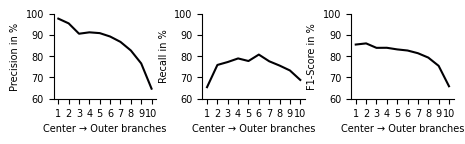

In [22]:
color = '#010003'
fontsize=7
fig_size=(4,1)
y_range=[60, 100]
x_label = "Center \u2192 Outer branches"
fig, axs = plt.subplots(1, 3, figsize=fig_size)
plt.tight_layout()


# precision
values = instance_evaluation['segmentation_results']['xy_partition_relative'].iloc[:, 2:12].mean(0).to_numpy() * 100
axs[0] = plot_instance_evaluation_segments(axs[0], values, fontsize=fontsize, measure="Precision in %", y_range=y_range, color=color, x_label=x_label)

# recall
values = instance_evaluation['segmentation_results']['xy_partition_relative'].iloc[:, 12:22].mean(0).to_numpy() * 100
axs[1] = plot_instance_evaluation_segments(axs[1], values, fontsize=fontsize, measure="Recall in %", y_range=y_range, color=color, x_label=x_label)


# f1-score
values = instance_evaluation['segmentation_results']['xy_partition_relative'].iloc[:, 22:32].mean(0).to_numpy() * 100
axs[2] = plot_instance_evaluation_segments(axs[2], values, fontsize=fontsize, measure="F1-Score in %", y_range=y_range, color=color, x_label=x_label)

fig.subplots_adjust(wspace=0.45, left=0, right=1, bottom=0.15, top=1)
plt.show()

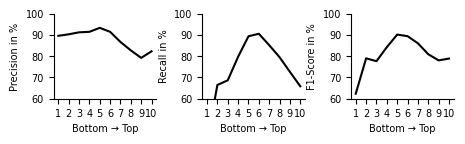

In [23]:
color = '#010003'
fontsize=7
fig_size=(4,1)
y_range=[60, 100]
x_label = "Bottom \u2192 Top"
fig, axs = plt.subplots(1, 3, figsize=fig_size)
plt.tight_layout()


# precision
values = instance_evaluation['segmentation_results']['z_partition_relative'].iloc[:, 2:12].mean(0).to_numpy() * 100
axs[0] = plot_instance_evaluation_segments(axs[0], values, fontsize=fontsize, measure="Precision in %", y_range=y_range, color=color, x_label=x_label)

# recall
values = instance_evaluation['segmentation_results']['z_partition_relative'].iloc[:, 12:22].mean(0).to_numpy() * 100
axs[1] = plot_instance_evaluation_segments(axs[1], values, fontsize=fontsize, measure="Recall in %", y_range=y_range, color=color, x_label=x_label)


# f1-score
values = instance_evaluation['segmentation_results']['z_partition_relative'].iloc[:, 22:32].mean(0).to_numpy() * 100
axs[2] = plot_instance_evaluation_segments(axs[2], values, fontsize=fontsize, measure="F1-Score in %", y_range=y_range, color=color, x_label=x_label)

fig.subplots_adjust(wspace=0.45, left=0, right=1, bottom=0.15, top=1)
plt.show()